<a href="https://colab.research.google.com/github/NehaKoulecar/Handwritten_Digit_Recognition/blob/master/Handwritten_digit_recognition_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten digit recognition - SVM Model

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split



In [4]:
# Reading training dataset
num = pd.read_csv('train.csv')
num.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
num.shape

(42000, 785)

#### Exploring data

In [6]:
num.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [7]:
# Verifying data for null values
round(100*(num.isnull().sum()/(len(num.index))),2).sort_values(ascending = False)

label       0.0
pixel515    0.0
pixel517    0.0
pixel518    0.0
pixel519    0.0
           ... 
pixel263    0.0
pixel264    0.0
pixel265    0.0
pixel266    0.0
pixel783    0.0
Length: 785, dtype: float64

No null values were found.

In [8]:
# Verifying number of unique columns
np.unique(num['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
num['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

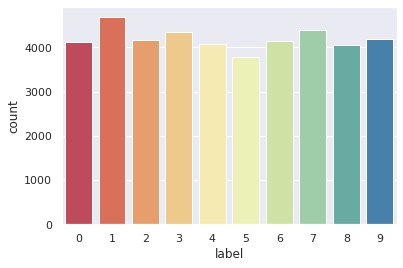

In [10]:
# Visualising the columns
sns.countplot(num['label'],palette = 'Spectral')

#### Data Preparation

In [11]:
# averaging feature values
pd.set_option('display.max_rows', 999)
round(num.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

pixel407    139.83
pixel435    139.07
pixel408    137.42
pixel434    135.52
pixel211    135.49
pixel210    133.59
pixel602    132.98
pixel212    132.90
pixel436    132.00
pixel601    130.81
pixel380    130.66
pixel406    130.14
pixel409    128.65
pixel381    127.50
pixel463    127.45
pixel575    126.73
pixel603    126.34
pixel209    126.26
pixel629    126.03
pixel462    126.01
pixel213    126.00
pixel574    125.56
pixel183    124.89
pixel379    124.51
pixel237    123.89
pixel238    123.23
pixel433    123.10
pixel628    122.65
pixel600    122.59
pixel240    122.22
pixel239    121.98
pixel184    121.90
pixel630    121.89
pixel241    121.77
pixel437    121.70
pixel464    121.32
pixel236    120.60
pixel182    119.70
pixel576    119.67
pixel547    118.65
pixel353    118.46
pixel548    117.19
pixel573    116.96
pixel242    116.12
pixel491    115.44
pixel461    115.36
pixel405    114.96
pixel352    113.93
pixel627    113.00
pixel208    112.99
pixel214    112.65
pixel492    112.60
pixel519    

Average lies from 140 to 0 hence scaling is performed.

In [12]:
# split data 
X = num.drop("label", axis = 1)
y = num['label']

In [13]:
# scale features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2,test_size = 0.8, random_state = 101)

In [14]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8400, 784)
y_train shape: (8400,)
X_test shape: (33600, 784)
y_test shape: (33600,)


#### Build models

Create Linear model

In [15]:
# Linaer model
model_linear1 = SVC(kernel='linear')
model_linear1.fit(X_train, y_train)

# Predict
y_pred = model_linear1.predict(X_test)

In [16]:
# Verifying accuracy and confusion matrix

print("model accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print("confusion matrix:","\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

model accuracy: 0.913125 

confusion matrix: 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


In [17]:
# Verifying scores
scores1 = metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores1)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3285
           1       0.95      0.98      0.97      3760
           2       0.90      0.91      0.90      3343
           3       0.89      0.88      0.88      3475
           4       0.88      0.93      0.91      3290
           5       0.87      0.86      0.87      3039
           6       0.95      0.95      0.95      3277
           7       0.92      0.92      0.92      3504
           8       0.91      0.87      0.89      3272
           9       0.90      0.86      0.88      3355

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



Accuracy for linear model is 91%. 

Creating non-linear models - rbf kernel

In [18]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

non_linear_model1 = SVC(kernel='rbf')

non_linear_model1.fit(X_train, y_train)

y_pred = non_linear_model1.predict(X_test)

In [19]:
# Verifying accuracy and confusion matrix

print("Model accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print("confusion matrix:","\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Model accuracy: 0.9396130952380952 

confusion matrix: 

[[3195    0   22    6    4    9   32    4   13    0]
 [   0 3690   23   13    7    2    7    6    8    4]
 [  15   14 3146   31   31    5   18   37   41    5]
 [   3    8   96 3192    5   72    6   30   43   20]
 [   3    7   57    1 3095   10   20   24    6   67]
 [  15    9   40   66   15 2780   50   15   31   18]
 [  18    5   48    1   11   31 3149    2   12    0]
 [   6   21   72   11   23    3    0 3284    3   81]
 [  13   24   42   63   14   63   22   19 2994   18]
 [  12   10   42   39   80    6    0   96   24 3046]]


In [20]:
# Verifying scores
scores1=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores1)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3285
           1       0.97      0.98      0.98      3760
           2       0.88      0.94      0.91      3343
           3       0.93      0.92      0.93      3475
           4       0.94      0.94      0.94      3290
           5       0.93      0.91      0.92      3039
           6       0.95      0.96      0.96      3277
           7       0.93      0.94      0.94      3504
           8       0.94      0.92      0.93      3272
           9       0.93      0.91      0.92      3355

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



Non-linear `rbf` model shows 94% accuracy. Hence choosing hyperparameters to `rbf` models.

#### SVM model with hyperparameters

In [21]:
# model with hyperparameters
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("model accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print("confusion matrix:","\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

model accuracy 0.9477083333333334 

confusion matrix: 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



In [22]:
# Printing scores
scores1=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.90      0.95      0.92      3343
           3       0.95      0.93      0.94      3475
           4       0.94      0.95      0.94      3290
           5       0.94      0.93      0.93      3039
           6       0.96      0.97      0.96      3277
           7       0.94      0.95      0.94      3504
           8       0.96      0.93      0.94      3272
           9       0.95      0.92      0.93      3355

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



Using the hyperparameters C = 10 and gamma = 0.001, we can observe that the model's overall accuracy is 95%.

#### SVM model for test data

In [23]:
# importing test dataset
test_df1 = pd.read_csv('test.csv')
test_df1.head(15)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_df1.shape

(28000, 784)

In [25]:
# scale data features
test_scaled1 = scale(test_df1)

In [26]:
# predictions on test dataset
test_predict = model.predict(test_scaled1)

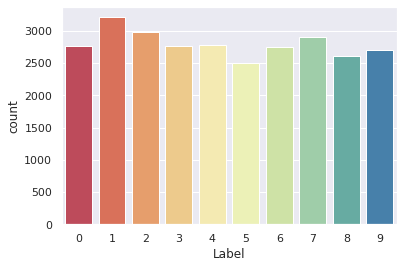

In [27]:
# distribution of prediction
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(data_to_export['Label'], palette = 'Spectral')

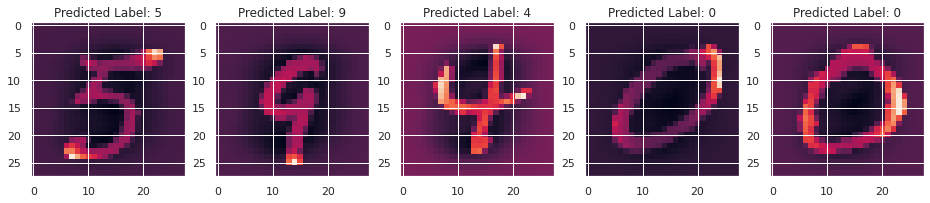

In [34]:
# Predicted digits by SVM model

df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled1[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

In [35]:
# Exporting the predicted values 
data_to_export.to_csv(path_or_buf='submission.csv', index=False)